In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

In [2]:
#Load in data
data = pd.read_csv('data/train.csv')

In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [5]:
#reindex with PetID
data.index = data['PetID']
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
# Drop 'Name' & 'RescuerID' columns
data.drop(columns = ['Name', 'RescuerID'], inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Age            14993 non-null  int64  
 2   Breed1         14993 non-null  int64  
 3   Breed2         14993 non-null  int64  
 4   Gender         14993 non-null  int64  
 5   Color1         14993 non-null  int64  
 6   Color2         14993 non-null  int64  
 7   Color3         14993 non-null  int64  
 8   MaturitySize   14993 non-null  int64  
 9   FurLength      14993 non-null  int64  
 10  Vaccinated     14993 non-null  int64  
 11  Dewormed       14993 non-null  int64  
 12  Sterilized     14993 non-null  int64  
 13  Health         14993 non-null  int64  
 14  Quantity       14993 non-null  int64  
 15  Fee            14993 non-null  int64  
 16  State          14993 non-null  int64  
 17  VideoAmt       14993 non-null  int64  
 18 

In [8]:
data['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

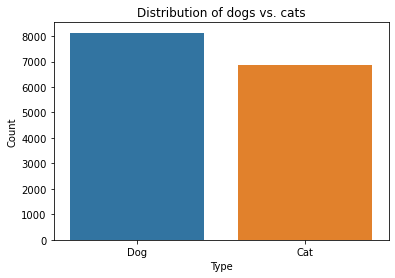

In [9]:
typeData = data.groupby(['Type']).count().reset_index()
typeData
ax = sns.barplot(x = 'Type', y = 'PetID', data=typeData)
plt.xticks(np.arange(0,2), ["Dog", "Cat"])
plt.ylabel('Count')
plt.title('Distribution of dogs vs. cats')
plt.show()

Let's split the data into two datasets: Dog and cat.

In [10]:
dogData = data[data.Type == 1]
catData = data[data.Type == 2]

In [11]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8132 entries, 3422e4906 to a83d95ead
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           8132 non-null   int64  
 1   Age            8132 non-null   int64  
 2   Breed1         8132 non-null   int64  
 3   Breed2         8132 non-null   int64  
 4   Gender         8132 non-null   int64  
 5   Color1         8132 non-null   int64  
 6   Color2         8132 non-null   int64  
 7   Color3         8132 non-null   int64  
 8   MaturitySize   8132 non-null   int64  
 9   FurLength      8132 non-null   int64  
 10  Vaccinated     8132 non-null   int64  
 11  Dewormed       8132 non-null   int64  
 12  Sterilized     8132 non-null   int64  
 13  Health         8132 non-null   int64  
 14  Quantity       8132 non-null   int64  
 15  Fee            8132 non-null   int64  
 16  State          8132 non-null   int64  
 17  VideoAmt       8132 non-null   int64  
 18  

In [12]:
catData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6861 entries, 86e1089a3 to e4da1c9e4
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6861 non-null   int64  
 1   Age            6861 non-null   int64  
 2   Breed1         6861 non-null   int64  
 3   Breed2         6861 non-null   int64  
 4   Gender         6861 non-null   int64  
 5   Color1         6861 non-null   int64  
 6   Color2         6861 non-null   int64  
 7   Color3         6861 non-null   int64  
 8   MaturitySize   6861 non-null   int64  
 9   FurLength      6861 non-null   int64  
 10  Vaccinated     6861 non-null   int64  
 11  Dewormed       6861 non-null   int64  
 12  Sterilized     6861 non-null   int64  
 13  Health         6861 non-null   int64  
 14  Quantity       6861 non-null   int64  
 15  Fee            6861 non-null   int64  
 16  State          6861 non-null   int64  
 17  VideoAmt       6861 non-null   int64  
 18  

### Dog data analysis

In [13]:
dogData.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
5842f1ff5,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
850a43f90,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
97aa9eeac,1,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8b693ca84,1,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1


In [14]:
dogData.Age.describe()

count    8132.000000
mean       12.906173
std        21.377588
min         0.000000
25%         2.000000
50%         3.000000
75%        12.000000
max       255.000000
Name: Age, dtype: float64

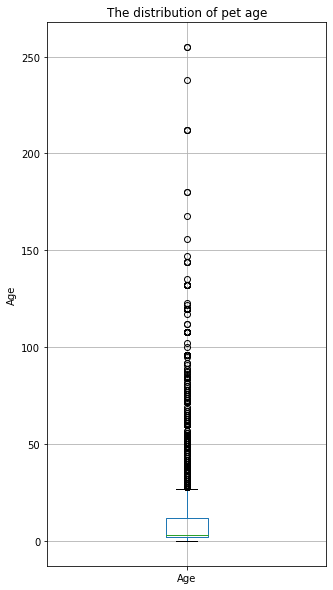

In [15]:
plt.figure(figsize = (5, 10))
data[['Age']].boxplot()
plt.ylabel('Age')
plt.title('The distribution of pet age')
plt.show()

75% of pets are between ages 0-12 months.  The distribution is highly right skewed. Let's remove outliers 3 stds below & above the mean.

In [16]:
z_scores = stats.zscore(dogData.Age)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
dogData = dogData[filtered_entries]

In [17]:
dogData['Breed1'].value_counts() #We notice a large proportion of breed 307 (mixed breed)

307    5881
141     191
205     161
179     157
218     157
       ... 
85        1
81        1
143       1
123       1
25        1
Name: Breed1, Length: 112, dtype: int64

In [18]:
dogData[dogData['Breed1'] == 0] 

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,
375905770,1,2,0,26,2,2,0,0,2,1,1,1,2,1,1,0,41326,0,Milo went missing after a week with her new ad...,375905770,3.0,3
da8d4a273,1,4,0,307,2,2,3,0,2,1,1,1,2,1,1,100,41326,0,"She's only 4 months old, very friendly and lov...",da8d4a273,5.0,4
7b5bee232,1,72,0,307,1,1,2,0,2,2,2,2,2,1,1,0,41326,0,He is a stray dog found wandering around Unive...,7b5bee232,5.0,4
0327b8e94,1,2,0,205,2,2,5,7,1,1,2,2,2,1,1,1,41336,0,I want to adopt a newborn puppy Prefer small b...,0327b8e94,0.0,3


In [19]:
#There appears to be some breeds mistakenly filled into Breed2 instead of Breed1, let's fix this.
dogData.Breed1 = np.where((dogData['Breed1']==0) & (dogData['Breed2']!=0), dogData['Breed2'], dogData['Breed1']) #If breed1 = 0 but not breed2, set breed1 to breed2 and breed2 to 0
dogData.Breed2 = np.where((dogData['Breed1']== dogData['Breed2']), 0, dogData['Breed2'])  #If breed1 = breed2, set breed2 to 0

In [20]:
dogData[(dogData.Breed1 == 307) & (dogData.Breed2 != 0)]

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,,
1bf24d8be,1,10,307,117,2,1,2,7,2,2,1,1,1,1,1,0,41326,0,Donut is a friendly doggie and very domesticat...,1bf24d8be,0.0,4
6fecc5cf7,1,1,307,141,2,1,0,0,2,2,2,1,1,1,2,0,41326,0,2 adorable female black pups rescued from USJ ...,6fecc5cf7,13.0,3
815f4cc08,1,3,307,141,1,5,0,0,2,2,3,3,2,1,1,0,41326,0,Lovely puppy with good nature looking for a ho...,815f4cc08,3.0,3
8df0bb3b3,1,2,307,76,1,1,7,0,2,1,1,1,2,1,1,0,41326,4,"Mochi, momo and Molly are siblings, about 3 mo...",8df0bb3b3,18.0,3
6d9b202c9,1,4,307,36,2,1,2,7,2,2,1,1,1,1,1,0,41326,0,She was found wandering around a playground of...,6d9b202c9,10.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1f58a286e,1,1,307,189,2,1,3,0,2,2,3,3,3,1,1,0,41326,0,Found it beside road under a big tree alone an...,1f58a286e,1.0,1
94e45a1a7,1,2,307,109,2,2,0,0,2,2,1,1,2,1,2,0,41327,0,"cute,fat,active^^ One male and one female",94e45a1a7,0.0,0
5bbf44cea,1,24,307,152,2,1,2,0,2,1,1,1,1,1,1,0,41327,0,Previously always stay together with a male do...,5bbf44cea,2.0,4


In [21]:
#If Breed1 == 307 and Breed2 != 0, swap the values so that Breed1 contains a known breed
tempBreed1 = np.where((dogData['Breed1'] == 307) & (dogData['Breed2'] != 0), dogData['Breed2'], dogData['Breed1'])
dogData.Breed2 = np.where((dogData['Breed1'] == 307) & (dogData['Breed2'] != 0), 307, dogData['Breed2'])
dogData.Breed1 = tempBreed1

In [22]:
#Create new predictor variable: pureBreed
dogData['PureBreed'] = np.where((dogData.Breed2 == 0) & (dogData.Breed1 != 307), 1, 0)

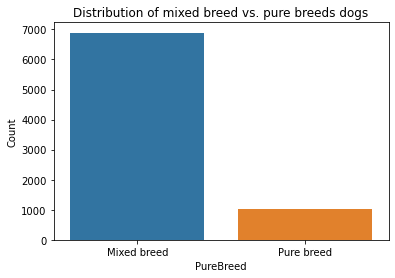

In [23]:
ax = sns.barplot(x = 'PureBreed', y = 'PetID', data=dogData.groupby(['PureBreed']).count().reset_index())
plt.xticks(np.arange(0,2), ["Mixed breed", "Pure breed"])
plt.ylabel('Count')
plt.title('Distribution of mixed breed vs. pure breeds dogs')
plt.show()

In [24]:
breedCounts = dogData.Breed1.value_counts(normalize = True).to_frame()

In [25]:
breedCounts.head(15)

,Breed1
307,0.694143
141,0.031431
218,0.026635
205,0.020449
179,0.020197
109,0.019566
103,0.016536
213,0.014264
189,0.013759
20,0.010982


Let's only keep the top 10 most prominent breeds and group the rest of the breeds as others: 999.

In [26]:
top10Breeds = list(breedCounts.index[:10])
dogData.Breed1 = np.where((dogData['Breed1'].isin(top10Breeds)), dogData['Breed1'], 999) 

In [27]:
dogData.Breed1.value_counts()

307    5499
999    1046
141     249
218     211
205     162
179     160
109     155
103     131
213     113
189     109
20       87
Name: Breed1, dtype: int64

In [45]:
enc = preprocessing.OneHotEncoder()
breedEnc = enc.fit_transform(dogData.Breed1.values.reshape(-1, 1)).toarray()
breedOneHot = pd.DataFrame(breedEnc, columns = ["Breed_"+str(i) for i in dogData.Breed1.unique() ])
dogData = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
dogData.drop(['Breed1', 'Breed2', 'PetID'], axis=1, inplace = True) 
dogData.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed,PureBreed,Breed_307,Breed_999,Breed_189,Breed_205,Breed_141,Breed_213,Breed_109,Breed_103,Breed_20,Breed_179,Breed_218
PetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3422e4906,1,1,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,Their pregnant mother was dumped by her irresp...,7.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5842f1ff5,1,4,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,"Good guard dog, very alert, active, obedience ...",8.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
850a43f90,1,1,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,This handsome yet cute boy is up for adoption....,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97aa9eeac,1,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,0,Siu Pak just give birth on 13/6/10 to 6puppies...,9.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8b693ca84,1,2,1,1,2,7,2,1,2,1,2,1,1,0,41401,0,"For serious adopter, please do sms or call for...",7.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
dogData.Gender.value_counts()

2    4157
1    2894
3     871
Name: Gender, dtype: int64

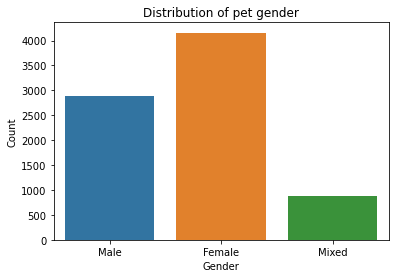

In [44]:
ax = sns.barplot(x = 'Gender', y = 'PetID', data=dogData.groupby(['Gender']).count().reset_index())
plt.xticks(np.arange(0,3), ["Male", "Female", "Mixed"])
plt.ylabel('Count')
plt.title('Distribution of pet gender')
plt.show()

In [ ]:
enc = preprocessing.OneHotEncoder()
genderEnc = enc.fit_transform(dogData.Gender.values.reshape(-1, 1)).toarray()
genderOneHot = pd.DataFrame(genderEnc, columns = ["Gender_"+str(i) for i in dogData.Gender.unique() ])
df = pd.concat([dogData, breedOneHot.set_index(dogData['PetID'])], axis=1)
# dropping 'Breed1' & 'Breed2' columns 
df= df.drop(['Breed1', 'Breed2', 'PetID'], axis=1) 
df.head()

In [ ]:
data.Color1.value_counts(dropna = False)

In [ ]:
data.Color2.value_counts()

In [ ]:
data.Color3.value_counts()

In [ ]:
#Reshape color data to be in the format for generating a histogram
colorData = pd.melt(data, id_vars = 'PetID', value_vars = ['Color1', 'Color2', 'Color3'], var_name = 'ColorNumber', value_name = 'ColorID')

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data = colorData, x = 'ColorID', hue = 'ColorNumber', stat= 'count', alpha = 0.4, multiple = 'dodge')
plt.xticks(np.arange(0,8), ['N/A', 'Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'])
plt.xlabel('Color')
plt.title('Distribution of primary (Color1) , secondary (Color2) and tertiary (Color3) color on pets')
plt.show()

In [ ]:
#Create new predictor: pureColor (1: 1 color, 2: 2 colors, 3: 3+ colors)

data['PureColor'] = np.where((data.Color3 != 0), 3, 2) #Identify pets with 3+ colors, label everything else as '2'
data['PureColor'] = np.where((data.Color2 == 0) & (data.pureColor == 2), 1, data.pureColor) #Update 2's to 1 if appropriate

In [ ]:
ax = sns.barplot(x = 'PureColor', y = 'PetID', data=data.groupby(['PureColor']).count().reset_index())
plt.xticks(np.arange(0,3), ["Pure color", "2 colors", "3+ colors"])
plt.ylabel('Count')
plt.title('Distribution of pure color pets')
plt.show()

In [ ]:
data.MaturitySize.value_counts()

In [ ]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'MaturitySize', y = 'PetID', data=data.groupby(['MaturitySize']).count().reset_index())
plt.xticks(np.arange(0,4), ['Small', 'Medium', 'Large', 'Extra Large'])
plt.ylabel('Count')
plt.title('Distribution of pet maturity size')
plt.xlabel('Maturity size')
plt.show()

In [ ]:
data.FurLength.value_counts()

In [ ]:
ax = sns.barplot(x = 'FurLength', y = 'PetID', data=data.groupby(['FurLength']).count().reset_index())
plt.xticks(np.arange(0,3), ['Short', 'Medium', 'Long'])
plt.ylabel('Count')
plt.title('Distribution of pet fur length')
plt.xlabel('Fur length')
plt.show()

In [ ]:
data.Vaccinated.value_counts()

In [ ]:
ax = sns.barplot(x = 'Vaccinated', y = 'PetID', data=data.groupby(['Vaccinated']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet vaccination status')
plt.xlabel('Vaccinated')
plt.show()

In [ ]:
data.Dewormed.value_counts()

In [ ]:
ax = sns.barplot(x = 'Dewormed', y = 'PetID', data=data.groupby(['Dewormed']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet deworm status')
plt.xlabel('Dewormed')
plt.show()

In [ ]:
data.Sterilized.value_counts()

In [ ]:
ax = sns.barplot(x = 'Sterilized', y = 'PetID', data=data.groupby(['Sterilized']).count().reset_index())
plt.xticks(np.arange(0,3), ['Yes', 'No', 'Unknown'])
plt.ylabel('Count')
plt.title('Distribution of pet sterilization status')
plt.xlabel('Sterilized')
plt.show()

In [ ]:
data.Health.value_counts()

In [ ]:
plt.figure(figsize = (5,8))
ax = sns.barplot(x = 'Health', y = 'PetID', data=data.groupby(['Health']).count().reset_index())
plt.xticks(np.arange(0,3), ['Healthy', 'Minor injury', 'Serious injury'])
plt.ylabel('Count')
plt.title('Distribution of pet health')
plt.xlabel('Health')
plt.show()

In [ ]:
data.Quantity.value_counts() #Need to create new predictor variable as there's too many categories

In [ ]:
data.Fee.value_counts() 

In [ ]:
data.State.value_counts() 

In [ ]:
data.VideoAmt.value_counts() 

In [ ]:
data.PhotoAmt.value_counts() 

In [ ]:
#create new predictor variable for description length
data['descLen'] = data['Description'].str.len()
data['descLen'].fillna(0, inplace = True)
data.head()

In [ ]:
plt.hist(data.descLen) #Need to create meaningful groups
plt.show()

In [ ]:
data.AdoptionSpeed.value_counts() 

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=data.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of pet adoption speed')
plt.xlabel('Adoption speed')
plt.show()

In [ ]:
sns.pairplot(data)